In [522]:
# Data manipulation
import pandas as pd
import numpy as np
# Plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# Pre-processing and model and metrics
from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import Ridge

from sklearn.model_selection import  train_test_split as tts
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler as mms , StandardScaler as ss
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

import dash
from dash import dcc, html, Input, Output


In [523]:
df = pd.read_csv(r"D:\DEPI\4- Machine Learning\Session 2\Housing.csv")
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [525]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [526]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [527]:
for x in df.columns:
    print(x, sorted(df[x].unique()))

price [1750000, 1767150, 1820000, 1855000, 1890000, 1960000, 2100000, 2135000, 2233000, 2240000, 2275000, 2310000, 2345000, 2380000, 2408000, 2450000, 2485000, 2520000, 2590000, 2604000, 2653000, 2660000, 2695000, 2730000, 2800000, 2835000, 2852500, 2870000, 2940000, 2961000, 2975000, 3003000, 3010000, 3045000, 3080000, 3087000, 3115000, 3118850, 3129000, 3143000, 3150000, 3220000, 3234000, 3255000, 3290000, 3325000, 3332000, 3353000, 3360000, 3395000, 3423000, 3430000, 3465000, 3493000, 3500000, 3535000, 3570000, 3605000, 3633000, 3640000, 3675000, 3703000, 3710000, 3745000, 3773000, 3780000, 3815000, 3836000, 3850000, 3885000, 3920000, 3990000, 4007500, 4025000, 4060000, 4095000, 4098500, 4123000, 4130000, 4165000, 4193000, 4200000, 4235000, 4270000, 4277000, 4305000, 4319000, 4340000, 4375000, 4382000, 4403000, 4410000, 4445000, 4473000, 4480000, 4515000, 4543000, 4550000, 4585000, 4613000, 4620000, 4655000, 4690000, 4753000, 4760000, 4767000, 4795000, 4830000, 4865000, 4893000, 490

In [528]:
df["area"].value_counts().sort_values()

area
2398      1
10240     1
7770      1
11460     1
9620      1
         ..
5500      9
4000     11
4500     13
3000     14
6000     24
Name: count, Length: 284, dtype: int64

In [529]:
df["price"].value_counts().sort_values()

price
13300000     1
1855000      1
12215000     1
1960000      1
11410000     1
            ..
5600000      9
3150000      9
4900000     12
4200000     17
3500000     17
Name: count, Length: 219, dtype: int64

d:\ElAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



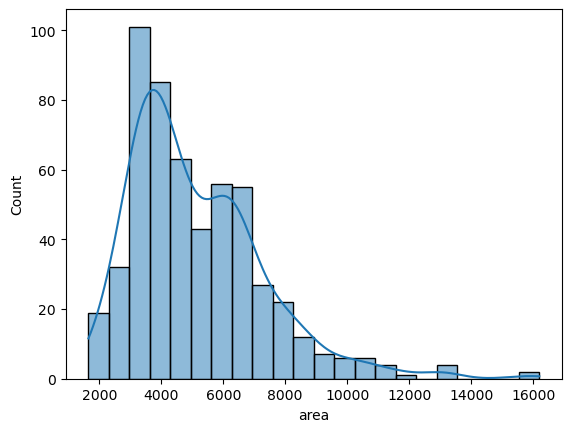

In [530]:
sns.histplot(df['area'], kde = True)
plt.show()

d:\ElAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



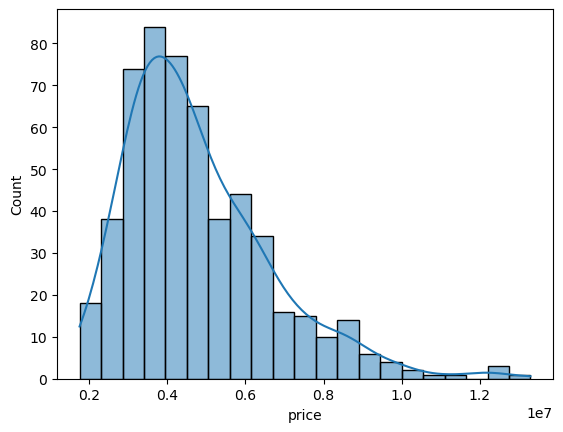

In [531]:
sns.histplot(df['price'], kde = True)
plt.show()

d:\ElAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



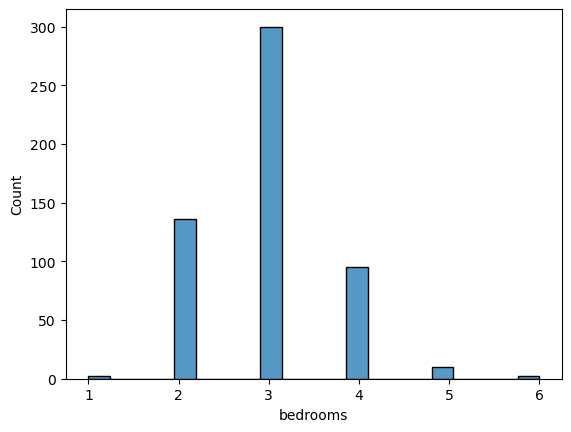

In [532]:
sns.histplot(df['bedrooms'])
plt.show()

d:\ElAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



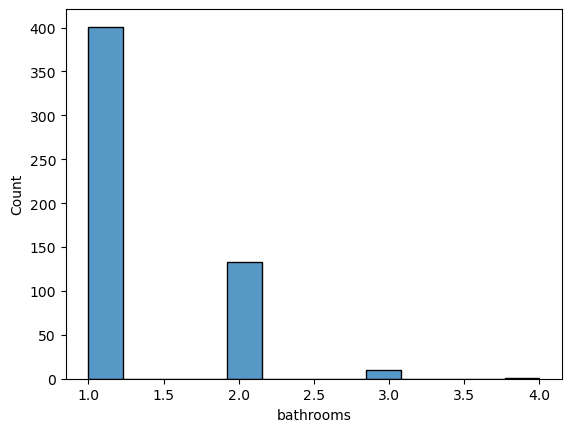

In [533]:
sns.histplot(df['bathrooms'])
plt.show()

d:\ElAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



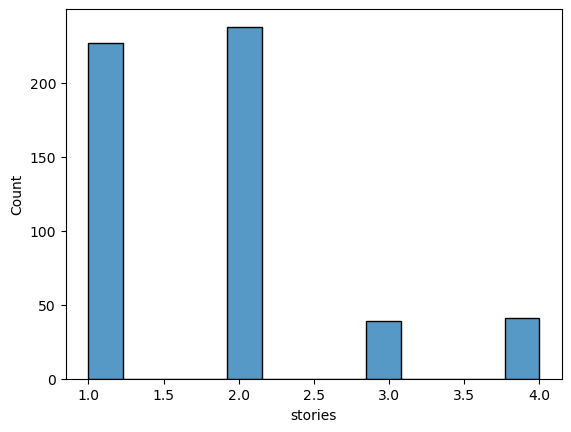

In [534]:
sns.histplot(df['stories'])
plt.show()

d:\ElAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



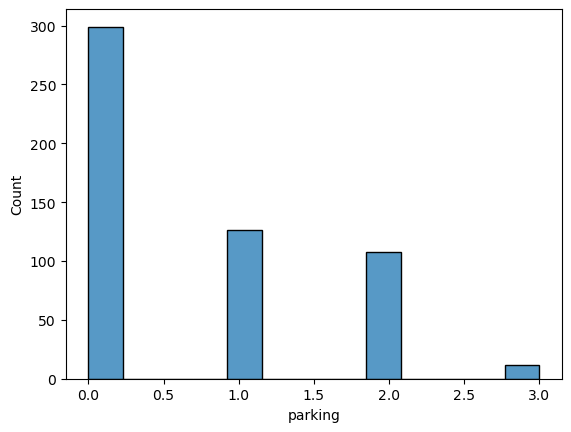

In [535]:
sns.histplot(df['parking'])
plt.show()

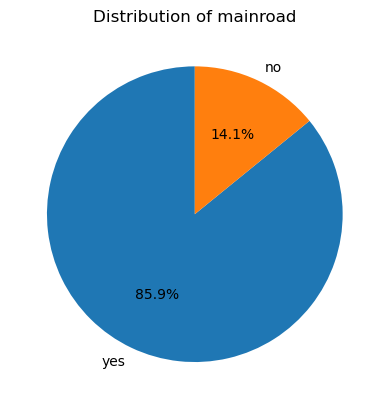

In [536]:
pie_chart = df['mainroad'].value_counts()
plt.pie(
    pie_chart,
    labels=pie_chart.index,
    autopct='%1.1f%%',
    startangle=90,

)

plt.title("Distribution of mainroad")
plt.show()

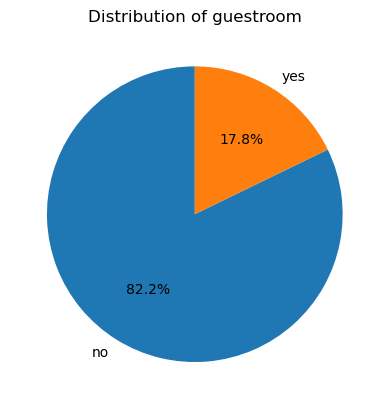

In [537]:
pie_chart = df['guestroom'].value_counts()


plt.pie(
    pie_chart,
    labels=pie_chart.index,
    autopct='%1.1f%%',
    startangle=90,
)

plt.title("Distribution of guestroom")
plt.show()

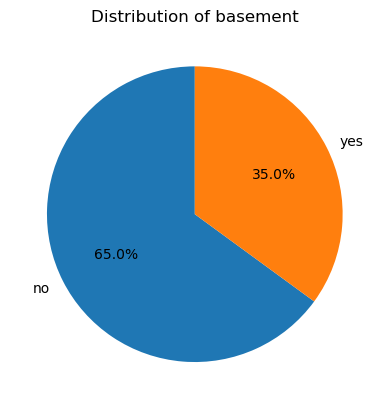

In [538]:
pie_chart = df['basement'].value_counts()


plt.pie(
    pie_chart,
    labels=pie_chart.index,
    autopct='%1.1f%%',
    startangle=90,
)

plt.title("Distribution of basement")
plt.show()

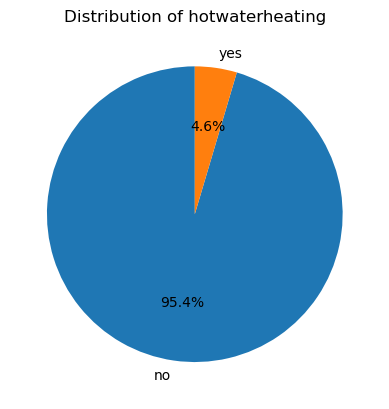

In [539]:
pie_chart = df['hotwaterheating'].value_counts()


plt.pie(
    pie_chart,
    labels=pie_chart.index,
    autopct='%1.1f%%',
    startangle=90,
)

plt.title("Distribution of hotwaterheating")
plt.show()

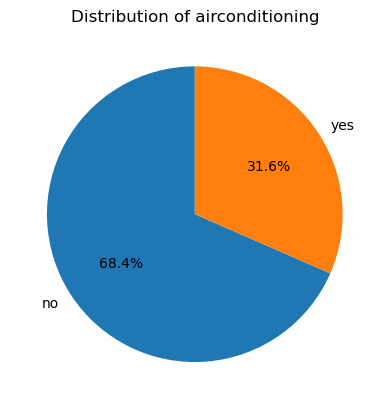

In [540]:
pie_chart = df['airconditioning'].value_counts()


plt.pie(
    pie_chart,
    labels=pie_chart.index,
    autopct='%1.1f%%',
    startangle=90,
)

plt.title("Distribution of airconditioning")
plt.show()

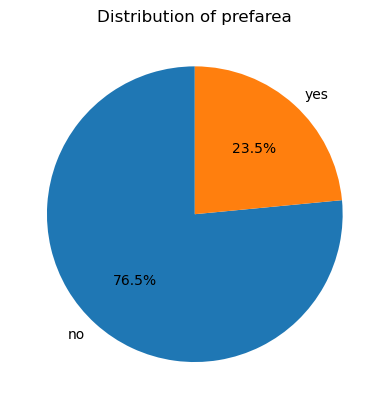

In [541]:
pie_chart = df['prefarea'].value_counts()


plt.pie(
    pie_chart,
    labels=pie_chart.index,
    autopct='%1.1f%%',
    startangle=90,
)

plt.title("Distribution of prefarea")
plt.show()

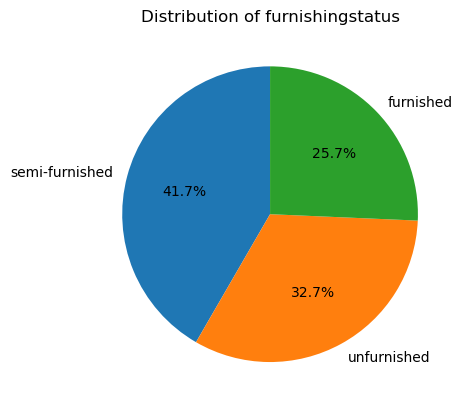

In [542]:
pie_chart = df['furnishingstatus'].value_counts()


plt.pie(
    pie_chart,
    labels=pie_chart.index,
    autopct='%1.1f%%',
    startangle=90,
)

plt.title("Distribution of furnishingstatus")
plt.show()

In [543]:
area_hist = px.histogram(df['area'])
price_hist = px.histogram(df['price'])
bedrooms_hist = px.histogram(df['bedrooms'])
bathrooms_hist = px.histogram(df['bathrooms'])
stories_hist = px.histogram(df['stories'])
parking_hist = px.histogram(df['parking'])

# Pre-processing

In [544]:
for x in df.columns:
    try:
        vals = [int(xx) for xx in df[x].unique()]
    except:
        print(x, sorted(df[x].unique()))

mainroad ['no', 'yes']
guestroom ['no', 'yes']
basement ['no', 'yes']
hotwaterheating ['no', 'yes']
airconditioning ['no', 'yes']
prefarea ['no', 'yes']
furnishingstatus ['furnished', 'semi-furnished', 'unfurnished']


In [545]:
df["furnishingstatus"] = df["furnishingstatus"].map({'unfurnished': 0, 'semi-furnished': 1,"furnished":2})

In [546]:
encode_col=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for col in encode_col:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [548]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


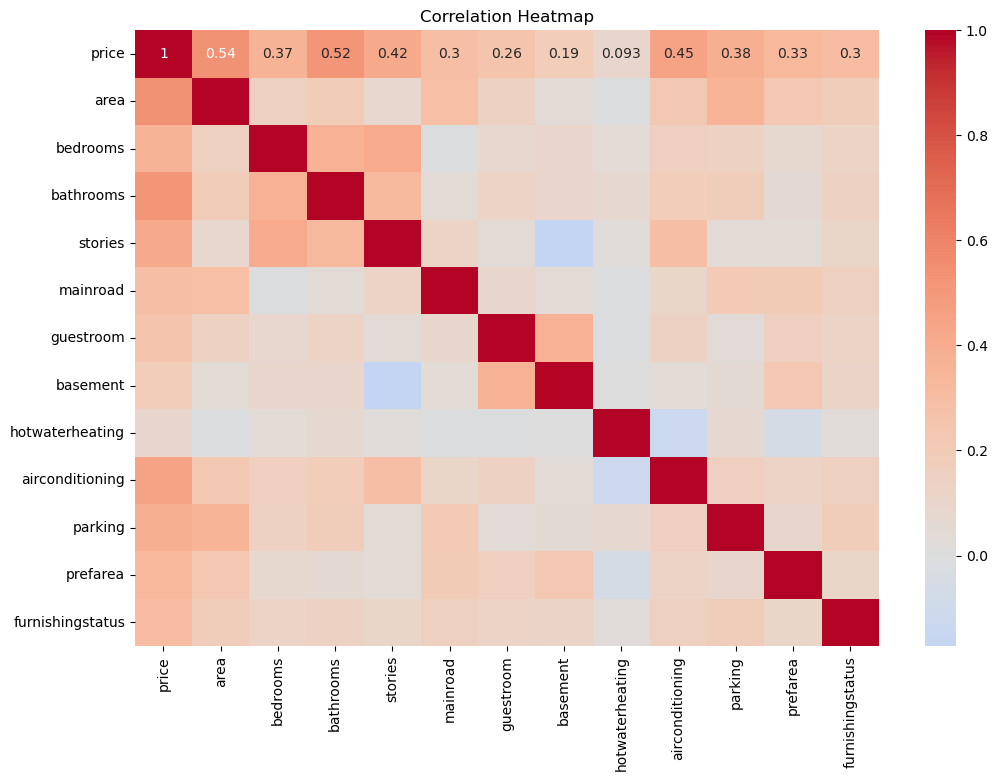

In [549]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [550]:
heatmap = px.imshow(
    corr,
    text_auto=True,       
    aspect="auto"     
)

heatmap.update_layout(
    title="Correlation Heatmap"
)

In [551]:
Scaler= ss()
df['price_scaled'] = Scaler.fit_transform(df[['price']])
df['area_scaled'] = Scaler.fit_transform(df[['area']])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_scaled,area_scaled
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,4.566365,1.046726
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,4.004484,1.757010
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,4.004484,2.218232
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,3.985755,1.083624
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,3.554979,1.046726


In [553]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'price_scaled',
       'area_scaled'],
      dtype='object')

In [554]:
features = list(df.columns)
features.remove('price')
features.remove('price_scaled')
features.remove('area')

model = lr()
x = df[features]
y = df['price_scaled']

X_train, X_test, y_train, y_test = tts(x, y, test_size=0.6, random_state=42)
X_valid, X_test, y_valid, y_test = tts(X_test, y_test, test_size=0.5, random_state=42)

model.fit(X_train, y_train)
print("model score",model.score(X_train,y_train))
y_pred_valid = model.predict(X_valid)
y_pred_test = model.predict(X_test)

mse_valid = mse(y_valid, y_pred_valid)
rmse_valid = mse_valid ** 0.5

mse_test = mse(y_test, y_pred_test)
rmse_valid = mse_test ** 0.5

print("RMSE Valid:", rmse_valid)
print("RMSE Test:", rmse_valid)

print(model.coef_)

model score 0.6857300403561137
RMSE Valid: 0.6435111613275973
RMSE Test: 0.6435111613275973
[0.10859544 0.48110225 0.16725756 0.2087289  0.24636438 0.21419047
 0.53566165 0.3638968  0.15925617 0.15813636 0.16661257 0.33072928]


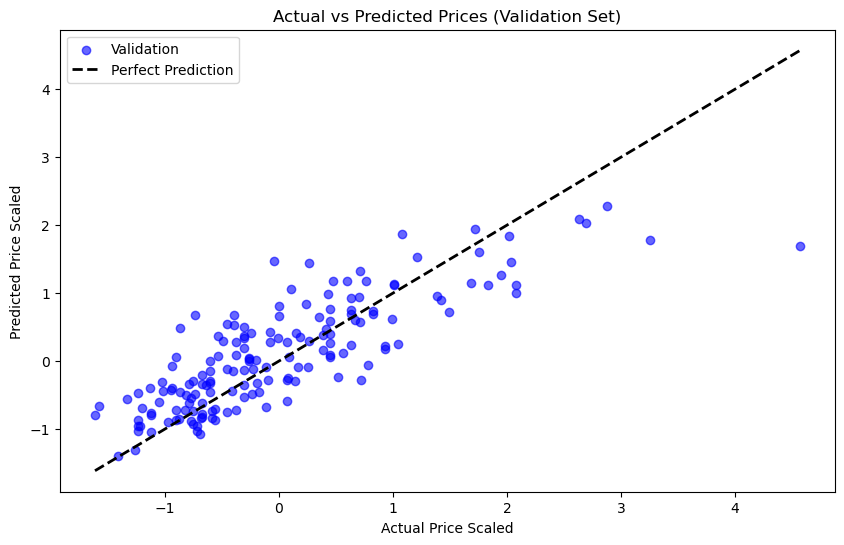

In [555]:
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_pred_valid, color='blue', alpha=0.6, label='Validation')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Price Scaled")
plt.ylabel("Predicted Price Scaled")
plt.title("Actual vs Predicted Prices (Validation Set)")
plt.legend()
plt.show()

In [556]:
fig_valid = px.scatter(
    x=y_valid, 
    y=y_pred_valid,
    opacity=0.6,
    color_discrete_sequence=["blue"], 
    labels={"x": "Actual Price Scaled", "y": "Predicted Price Scaled"},
    title="Actual vs Predicted Prices (Validation Set)"
)

# Add perfect prediction line
fig_valid.add_trace(
    go.Scatter(
        x=[y_valid.min(), y_valid.max()],
        y=[y_valid.min(), y_valid.max()],
        mode="lines",
        line=dict(color="black", dash="dash"),
        name="Perfect Prediction"
    )
)

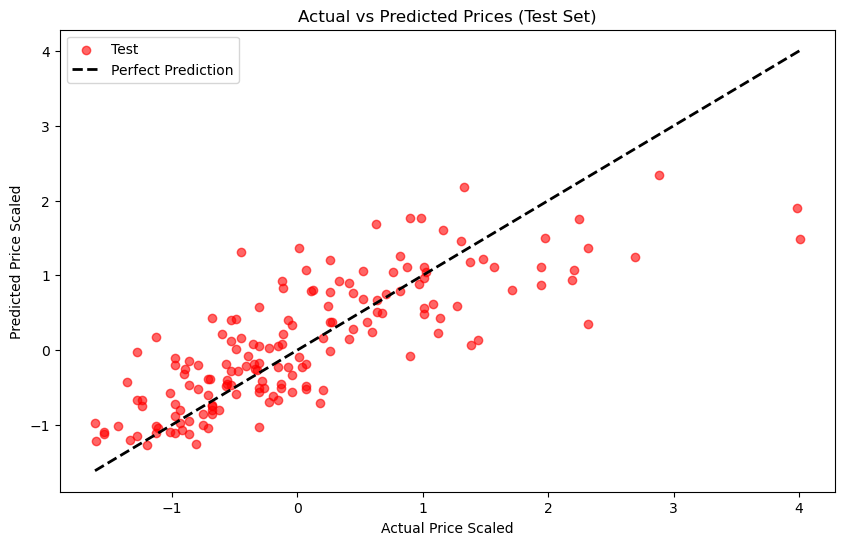

In [557]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='red', alpha=0.6, label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Price Scaled")
plt.ylabel("Predicted Price Scaled")
plt.title("Actual vs Predicted Prices (Test Set)")
plt.legend()
plt.show()

In [558]:
fig_test = px.scatter(
    x=y_test, 
    y=y_pred_test,
    opacity=0.6,
    color_discrete_sequence=["red"], 
    labels={"x": "Actual Price Scaled", "y": "Predicted Price Scaled"},
    title="Actual vs Predicted Prices (Test Set)"
)

# Add perfect prediction line
fig_test.add_trace(
    go.Scatter(
        x=[y_test.min(), y_test.max()],
        y=[y_test.min(), y_test.max()],
        mode="lines",
        line=dict(color="black", dash="dash"),
        name="Perfect Prediction"
    )
)

In [559]:
app = dash.Dash(__name__)
app.layout = html.Div([

    html.H1("Housing Prices Dataset", style={"textAlign": "center", "color": "cyan", 'font-family': 'Arial'}),

    html.H2("Normal Visuallizations", style={"color": "cyan"}),

    dcc.Dropdown(
        id="visual-dropdown",
        options=[
            {"label": "Area Histogram", "value": "hist1"},
            {"label": "Price Histogram", "value": "hist2"},
            {"label": "Parking Histogram", "value": "hist3"},
            {"label": "Stories Histogram", "value": "hist4"},
            {"label": "Bedrooms Histogram", "value": "hist5"},
            {"label": "Bathrooms Histogram", "value": "hist6"},
            {"label": "Features Heatmap", "value": "hmap"},
        ],
        value="hist1",
        clearable=False,
    ),

    dcc.Graph(id="visual-output"),

    html.H2("Result Plots", style={"color": "cyan"}),

    dcc.Graph(figure=fig_valid),
    
    dcc.Graph(figure=fig_test)

    ])
    

@app.callback(
    Output("visual-output", "figure"),
    Input("visual-dropdown", "value")
)

def update_graph(selected_plot):
    if selected_plot == "hist1":
        return area_hist
    elif selected_plot == "hist2":
        return price_hist
    elif selected_plot == "hist3":
        return parking_hist
    elif selected_plot == "hist4":
        return stories_hist
    elif selected_plot == "hist5":
        return bedrooms_hist
    elif selected_plot == "hist6":
        return bathrooms_hist
    elif selected_plot == "hmap":
        return heatmap

if __name__ == "__main__":
    app.run(debug=True)
